# Image model voice audio classifier

This notebook generates spectrograms of aiff files generated by the `say` command on macOS using different voices.
It then trains a model on these spectrograms so that it can classify which voice produced a given spectrogram image.

To install additional voices for the `say` command, go to `System Settings > Spoken Content > System voice > Manage Voices...`.

Most of the code is LLM generated.
Because of this approach, the code may be suboptimal or buggy.
I didn't check it too carefully and it accomplished the job I set out to do.

I run my notebooks in VS Code/Cursor, so before I get started I run

```sh
python -m venv .venv
```

then select that as my notebook Kernel.
Then I install the notebook dependencies.

In [ ]:
!pip install --upgrade pip
!pip install fastai librosa

In [15]:
# List of LLM-generated phrases
phrases = [
    "Hello, world!",
    "The quick brown fox jumps over the lazy dog.",
    "To be or not to be, that is the question.",
    "All that glitters is not gold.",
    "A picture is worth a thousand words.",
    "Actions speak louder than words.",
    "Better late than never.",
    "Every cloud has a silver lining.",
    "Don't count your chickens before they hatch.",
    "Easy come, easy go.",
    "Fortune favors the bold.",
    "Haste makes waste.",
    "Knowledge is power.",
    "Laughter is the best medicine.",
    "Money doesn't grow on trees.",
    "No pain, no gain.",
    "Practice makes perfect.",
    "Rome wasn't built in a day.",
    "The early bird catches the worm.",
    "Time is money.",
    "United we stand, divided we fall.",
    "Where there's a will, there's a way.",
    "You can't judge a book by its cover.",
    "Absence makes the heart grow fonder.",
    "Beauty is in the eye of the beholder.",
    "The pen is mightier than the sword.",
    "When in Rome, do as the Romans do.",
    "Two wrongs don't make a right.",
    "The grass is always greener on the other side.",
    "Don't put all your eggs in one basket.",
    "A watched pot never boils.",
    "Curiosity killed the cat.",
    "The apple doesn't fall far from the tree.",
    "A bird in the hand is worth two in the bush.",
    "Honesty is the best policy.",
    "When it rains, it pours.",
    "A friend in need is a friend indeed.",
    "The squeaky wheel gets the grease.",
    "A penny saved is a penny earned.",
    "Don't bite the hand that feeds you.",
    "The early bird catches the worm.",
    "A rolling stone gathers no moss.",
    "You can lead a horse to water, but you can't make it drink.",
    "Beggars can't be choosers.",
    "The best things in life are free.",
    "If it ain't broke, don't fix it.",
    "There's no place like home.",
    "The customer is always right.",
    "Two heads are better than one.",
    "The devil is in the details.",
    "A chain is only as strong as its weakest link.",
    "Don't cry over spilled milk.",
    "An apple a day keeps the doctor away.",
    "A leopard can't change its spots.",
    "The early bird catches the worm.",
    "A stitch in time saves nine.",
    "Cleanliness is next to godliness.",
    "Don't look a gift horse in the mouth.",
    "The proof is in the pudding.",
    "A penny for your thoughts.",
    "When the going gets tough, the tough get going.",
    "The bigger they are, the harder they fall.",
    "A fool and his money are soon parted.",
    "Don't put off until tomorrow what you can do today.",
    "Every dog has its day.",
    "It's not over till it's over.",
    "The more, the merrier.",
    "Necessity is the mother of invention.",
    "Out of sight, out of mind.",
    "The road to hell is paved with good intentions.",
    "There's no such thing as a free lunch.",
    "Too many cooks spoil the broth.",
    "When in doubt, leave it out.",
    "You can't have your cake and eat it too.",
    "A little knowledge is a dangerous thing.",
    "All good things must come to an end.",
    "Better safe than sorry.",
    "Don't bite off more than you can chew.",
    "Every cloud has a silver lining.",
    "Familiarity breeds contempt.",
    "Great minds think alike.",
    "Hindsight is 20/20.",
    "If you can't beat them, join them.",
    "It takes two to tango.",
    "Keep your friends close and your enemies closer.",
    "Let sleeping dogs lie.",
    "Make hay while the sun shines.",
    "Never say never.",
    "Once bitten, twice shy.",
    "People who live in glass houses shouldn't throw stones.",
    "The best defense is a good offense.",
    "The darkest hour is just before the dawn.",
    "The exception proves the rule.",
    "The show must go on.",
    "There's more than one way to skin a cat.",
    "Time heals all wounds.",
    "Two's company, three's a crowd.",
    "Variety is the spice of life.",
    "What goes around comes around.",
    "You can't teach an old dog new tricks."
]

voices = [
    "Samantha",
    "Evan",
    "Ava",
    "Allison",
]


In [16]:
import os

# Create the 'audio' folder if it doesn't exist
audio_folder = 'audio'
if not os.path.exists(audio_folder):
    os.makedirs(audio_folder)
    print(f"Created folder: {audio_folder}")
else:
    print(f"Folder already exists: {audio_folder}")

# Create subfolders for each voice name
for voice in voices:
    voice_folder = os.path.join(audio_folder, voice)
    if not os.path.exists(voice_folder):
        os.makedirs(voice_folder)
        print(f"Created subfolder: {voice_folder}")
    else:
        print(f"Subfolder already exists: {voice_folder}")


Folder already exists: audio
Subfolder already exists: audio/Samantha
Subfolder already exists: audio/Evan
Subfolder already exists: audio/Ava
Subfolder already exists: audio/Allison


In [17]:
import subprocess

def create_aiff_file(voice, text, output_filename):
    """
    Create an AIFF file using the macOS 'say' command.

    Args:
    voice (str): The name of the voice to use.
    text (str): The text to be spoken.
    output_filename (str): The name of the output AIFF file.

    Returns:
    str: The path to the created AIFF file.
    """
    output_path = os.path.join(audio_folder, voice, output_filename)

    command = [
        'say',
        '-v', voice,
        '-o', output_path,
        text
    ]

    try:
        subprocess.run(command, check=True, capture_output=True, text=True)
        return output_path
    except subprocess.CalledProcessError as e:
        print(f"Error creating AIFF file: {e}")
        return None

# Example usage:
# create_aiff_file("Alex", "Hello, I am iMac", "hello_i_am_imac.aiff")


In [18]:
# Create audio files for each phrase and voice
for i, phrase in enumerate(phrases):
    for voice in voices:
        output_filename = f"{voice.lower()}_{i+1:02d}_{phrase[:20].lower().replace(' ', '_')}.aiff"
        output_path = os.path.join(audio_folder, voice, output_filename)

        if not os.path.exists(output_path):
            create_aiff_file(voice, phrase, output_filename)
        else:
            print(f"File already exists: {output_path}")

print("All audio files have been created or already exist.")


File already exists: audio/Samantha/samantha_01_hello,_world!.aiff
File already exists: audio/Evan/evan_01_hello,_world!.aiff
File already exists: audio/Ava/ava_01_hello,_world!.aiff
File already exists: audio/Allison/allison_01_hello,_world!.aiff
File already exists: audio/Samantha/samantha_02_the_quick_brown_fox_.aiff
File already exists: audio/Evan/evan_02_the_quick_brown_fox_.aiff
File already exists: audio/Ava/ava_02_the_quick_brown_fox_.aiff
File already exists: audio/Allison/allison_02_the_quick_brown_fox_.aiff
File already exists: audio/Samantha/samantha_03_to_be_or_not_to_be,_.aiff
File already exists: audio/Evan/evan_03_to_be_or_not_to_be,_.aiff
File already exists: audio/Ava/ava_03_to_be_or_not_to_be,_.aiff
File already exists: audio/Allison/allison_03_to_be_or_not_to_be,_.aiff
File already exists: audio/Samantha/samantha_04_all_that_glitters_is.aiff
File already exists: audio/Evan/evan_04_all_that_glitters_is.aiff
File already exists: audio/Ava/ava_04_all_that_glitters_is.a

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def create_spectrogram(input_file, output_file):
    """
    Create a color spectrogram image from an audio file.

    Args:
    input_file (str): Path to the input audio file.
    output_file (str): Path to save the output spectrogram image.
    """
    # Load the audio file
    y, sr = librosa.load(input_file)

    # Compute the mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Convert to dB scale
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Create a new figure with a specific size
    plt.figure(figsize=(12, 8))

    # Display the mel spectrogram without axes, ticks, labels, and colorbar
    librosa.display.specshow(S_dB, cmap='viridis')

    # Remove all axes, ticks, labels, and legends
    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])

    # Save the figure without any padding
    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0)

    # Close the figure to free up memory
    plt.close()


# Example usage:
# create_spectrogram("input_audio.aiff", "output_spectrogram.png")


In [ ]:
import os

# Define the input and output folders
output_folder = "audio_images"

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all folders in the audio folder
for voice_folder in os.listdir(audio_folder):
    voice_path = os.path.join(audio_folder, voice_folder)
    if os.path.isdir(voice_path):
        # Create the output subfolder for this voice if it doesn't exist
        output_voice_folder = os.path.join(output_folder, voice_folder)
        if not os.path.exists(output_voice_folder):
            os.makedirs(output_voice_folder)

        # Iterate through all files in the voice folder
        for filename in os.listdir(voice_path):
            if filename.endswith(".aiff"):
                # Extract index from the filename
                index = filename.split("_")[1]

                # Define input and output file paths
                input_file = os.path.join(voice_path, filename)
                output_file = os.path.join(output_voice_folder, f"{index}.png")

                # Create the spectrogram only if the image doesn't exist
                if not os.path.exists(output_file):
                    create_spectrogram(input_file, output_file)
                else:
                    print(f"Spectrogram {output_file} already exists. Skipping.")

print("All spectrograms have been created or already exist.")


Now, let's load the data and train a model following the approach in the [Fast.ai course lesson 1 notebook](https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data).

In [7]:
from fastcore.all import *
from fastai.vision.all import *

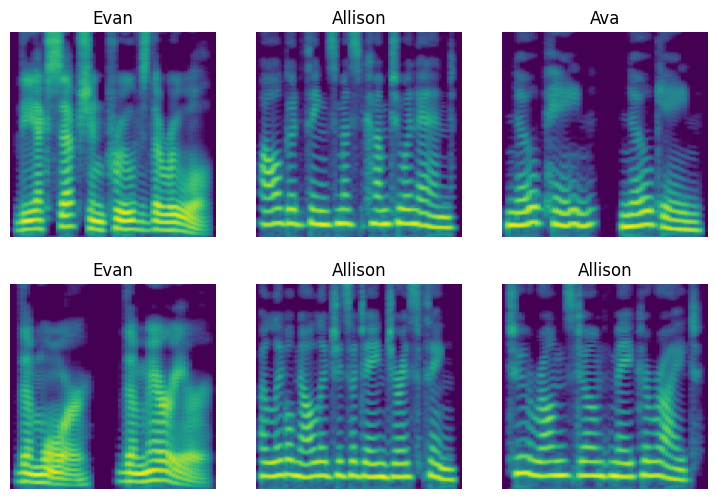

In [8]:
path = Path('audio_images')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(800, method='squish')]
).dataloaders(path, bs=32)
dls.show_batch(max_n=6)

The following finetune took about 5 minutes on my machine.
Based on the `error_rate` I saw, I probably could have gotten away with running `learn.fine_tune(3)` and still got a well performing model.

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.805213,2.417706,0.759494,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.631365,0.856591,0.367089,01:07
1,0.392307,0.456003,0.202532,01:08
2,0.251462,0.087148,0.025316,01:09
3,0.180996,0.049598,0.012658,01:08
4,0.141887,0.057393,0.012658,01:08


With the model trained, now you can test it out by running inference on your own example

In [28]:
from pathlib import Path

voice = "Allison"
text = "Machine learning is amazing!"
filename = "allison_test1.aiff"
image_name = "allison_test1.png"

create_aiff_file(voice, text, filename)
create_spectrogram(Path(audio_folder) / voice / filename, image_name)
voice_name, _, _ = learn.predict(PILImage.create(image_name))
assert voice_name == voice
print(f"The model correctly predicted the voice is {voice_name}")

Created AIFF file: audio/Allison/allison_test1.aiff
Spectrogram saved as allison_test1.png


The model correctly predicted the voice is Allison


That's it!